In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import ClusterStats.cluster_stats as cs

In [3]:
%matplotlib inline

In [4]:
cd ~/Dropbox/EstherProject/data/

/Users/fpbatta/Dropbox/EstherProject/data


In [6]:
df = pd.read_csv('downPeakAmpsAndDur.csv')

In [27]:
# let's consider one condition for one animal

df_now = df[(df.virus == 'eNpHR3') & (df.animal == 'CL20') & (df.stim_dur == 90)]

This is the histogram of the stimulus phases

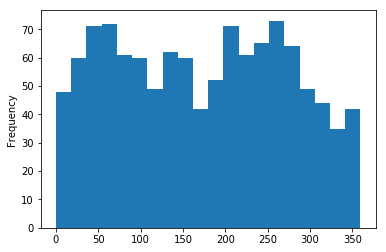

In [128]:
df_now.stim_phase.plot.hist(bins=20)

Add a column with binned phases

In [131]:
n_bins = 20

df_now['phase_bin'] = 0
df_now['phase_bin'] = (df_now.loc[:, 'stim_phase'] // (360/20)).copy().astype(np.int)
df_now.to_csv('fig2_stats.csv')

/usr/local/anaconda/envs/ClusterStats/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/envs/ClusterStats/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Run the Maris & Oostenveld statistics, on the 'closestpeaksy' 

In [140]:
cl, stats, cl_pval = cs.cluster_stats_pvalue(df_now, 'stim_on', 'closestpeaky', 
                                             n_repetitions=10000, 
                                             site_statistics=cs.site_statistics_ttest_ind_multi_group, 
                                             connectivity='1dcyclic',
                                             col_bins='phase_bin', two_sided=True
                                            )

plot in red the significant cluster

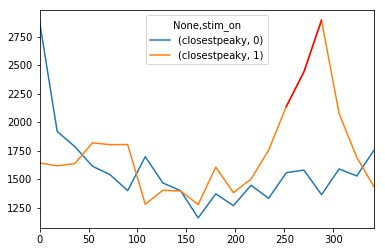

In [144]:
gp = df_now.groupby(['phase_bin', 'stim_on']).closestpeaky.mean()

gp = gp.to_frame()
bins_deg = np.linspace(0, 360, 21)[:-1]
gp = gp.reset_index().pivot(index='phase_bin', columns='stim_on').set_index(bins_deg)
sign_y = gp.iloc[cl[0], 1]
gp.plot()
plt.plot(bins_deg[cl[0]], sign_y, 'r')
